# IntroStat Week 11

Welcome to the 11th lecture in IntroStat

During the lectures we will present both slides and notebooks. 

This is the notebook used in the lecture in week 11.


In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import statsmodels.stats.proportion as smprop


### Example: Intro to ANOVA

In [96]:
# Make pandas dataframe with grouped data:
data = pd.DataFrame({
    'value':  [2.8, 3.6, 3.4, 2.3, 5.5, 6.3, 6.1, 5.7, 5.8, 8.3, 6.9, 6.1], 
    'group':  ["A", "A", "A", "A", "B", "B", "B", "B", "C", "C", "C", "C"]})
data

value group
0     2.8     A
1     3.6     A
2     3.4     A
3     2.3     A
4     5.5     B
5     6.3     B
6     6.1     B
7     5.7     B
8     5.8     C
9     8.3     C
10    6.9     C
11    6.1     C

<Axes: xlabel='group', ylabel='value'>

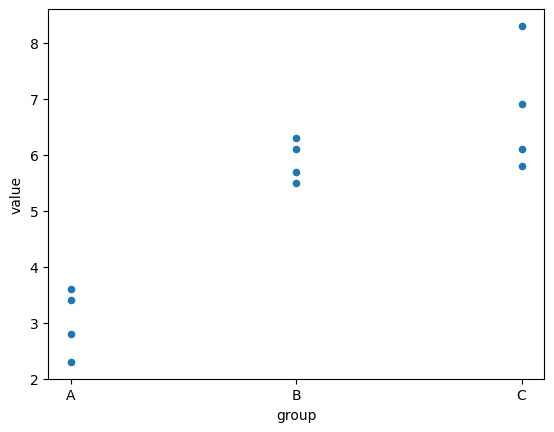

In [97]:
data.plot.scatter('group', 'value')

<Axes: title={'center': 'value'}, xlabel='[group]'>

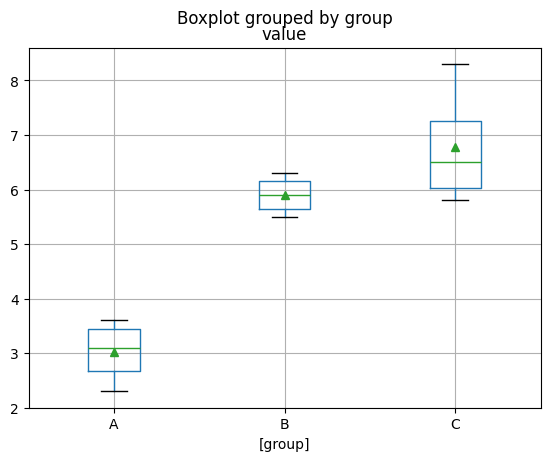

In [98]:
data.boxplot(by="group", showmeans=True)

The three groups have different means - indicated by the green triangles

<Axes: >

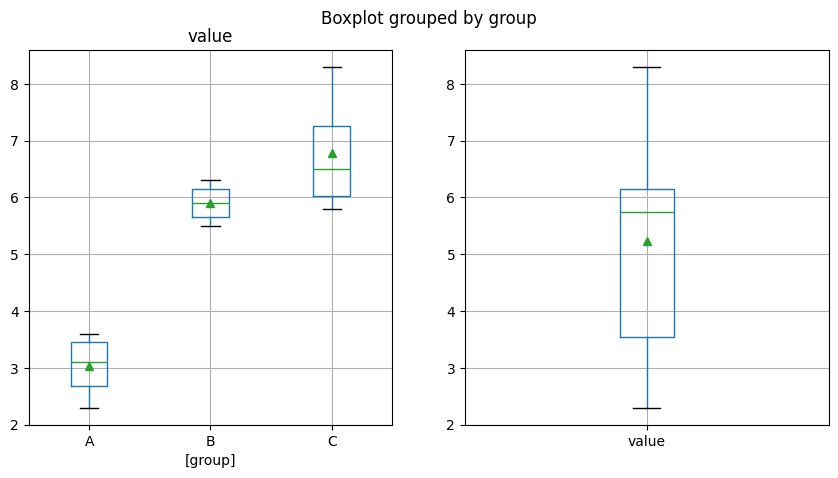

In [99]:
# compare visualising the three groups seperately versus all data pooled together:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data.boxplot(by="group", ax=axs[0], showmeans=True)
data.boxplot(ax=axs[1], showmeans=True)

Questions:

Do you think there is a significant difference between the groups? (why? or why not? and what would make the difference more clear/more significant?)

Do you think the data in the three groups could each be a random subset of the pooled data?

<Axes: >

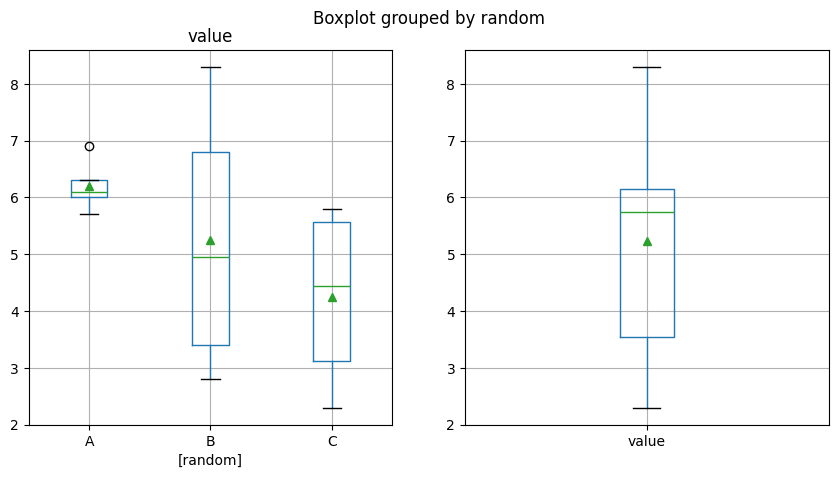

In [100]:
# lets make a random allocation of group and plot again (run this cell several times to simulate new random groups)
data["random"] = np.random.choice(data["group"], replace=False, size=len(data))

# compare visualising the three groups seperately versus all data pooled together:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data.boxplot(by="random", ax=axs[0], showmeans=True)
data.boxplot(ax=axs[1], showmeans=True)


### Example: Estimate parameters $\mu$, $\alpha_i$ and $\sigma^2$

In [101]:
# Compute the overall mean and add to dataframe:
data['overall_mean'] = data["value"].mean()
data

value group random  overall_mean
0     2.8     A      B      5.233333
1     3.6     A      B      5.233333
2     3.4     A      C      5.233333
3     2.3     A      C      5.233333
4     5.5     B      C      5.233333
5     6.3     B      B      5.233333
6     6.1     B      A      5.233333
7     5.7     B      A      5.233333
8     5.8     C      C      5.233333
9     8.3     C      B      5.233333
10    6.9     C      A      5.233333
11    6.1     C      A      5.233333

In [102]:
# compute the mean within each group and add to dataframe:
data['group_mean'] = data.groupby("group")['value'].transform('mean')
data

value group random  overall_mean  group_mean
0     2.8     A      B      5.233333       3.025
1     3.6     A      B      5.233333       3.025
2     3.4     A      C      5.233333       3.025
3     2.3     A      C      5.233333       3.025
4     5.5     B      C      5.233333       5.900
5     6.3     B      B      5.233333       5.900
6     6.1     B      A      5.233333       5.900
7     5.7     B      A      5.233333       5.900
8     5.8     C      C      5.233333       6.775
9     8.3     C      B      5.233333       6.775
10    6.9     C      A      5.233333       6.775
11    6.1     C      A      5.233333       6.775

In [103]:
# compute the "alpha" for each group and add to dataframe:
data["alpha"] = data["group_mean"] - data["overall_mean"]
data

value group random  overall_mean  group_mean     alpha
0     2.8     A      B      5.233333       3.025 -2.208333
1     3.6     A      B      5.233333       3.025 -2.208333
2     3.4     A      C      5.233333       3.025 -2.208333
3     2.3     A      C      5.233333       3.025 -2.208333
4     5.5     B      C      5.233333       5.900  0.666667
5     6.3     B      B      5.233333       5.900  0.666667
6     6.1     B      A      5.233333       5.900  0.666667
7     5.7     B      A      5.233333       5.900  0.666667
8     5.8     C      C      5.233333       6.775  1.541667
9     8.3     C      B      5.233333       6.775  1.541667
10    6.9     C      A      5.233333       6.775  1.541667
11    6.1     C      A      5.233333       6.775  1.541667

In [104]:
# calculate the individual contribution to SSE and add to dataframe:
data['sse_contribution'] = (data['value']-data['group_mean'])**2
data

value group random  overall_mean  group_mean     alpha  sse_contribution
0     2.8     A      B      5.233333       3.025 -2.208333          0.050625
1     3.6     A      B      5.233333       3.025 -2.208333          0.330625
2     3.4     A      C      5.233333       3.025 -2.208333          0.140625
3     2.3     A      C      5.233333       3.025 -2.208333          0.525625
4     5.5     B      C      5.233333       5.900  0.666667          0.160000
5     6.3     B      B      5.233333       5.900  0.666667          0.160000
6     6.1     B      A      5.233333       5.900  0.666667          0.040000
7     5.7     B      A      5.233333       5.900  0.666667          0.040000
8     5.8     C      C      5.233333       6.775  1.541667          0.950625
9     8.3     C      B      5.233333       6.775  1.541667          2.325625
10    6.9     C      A      5.233333       6.775  1.541667          0.015625
11    6.1     C      A      5.233333       6.775  1.541667          0.455625

In [105]:
# calculate SSE and MSE:
SSE = data["sse_contribution"].sum()
MSE = SSE / (12-3)
print([SSE, MSE])

[5.195000000000004, 0.5772222222222226]


### Example: ANOVA table with python

In [106]:
# Make the ANOVA table:
fit = smf.ols("value ~ group", data=data).fit()
anova_table = sm.stats.anova_lm(fit)
print(anova_table)


           df     sum_sq    mean_sq          F    PR(>F)
group     2.0  30.791667  15.395833  26.672281  0.000165
Residual  9.0   5.195000   0.577222        NaN       NaN


### Example: F-test

OBS: The F-test is also part of the ANOVA table output (see table above)

Here we also do the calculation *manually*

In [ ]:
# We have already calculated SSE and MSE
print([SSE, MSE])

In [ ]:
# recall the data:
data

In [ ]:
# calculate SST contribution of each datapoint:
data["sst_contribution"] = (data["value"] - data["overall_mean"])**2
data

In [ ]:
# calculate SST:
SST = data["sst_contribution"].sum()
print([SST])

In [ ]:
# We know SST = SSTr + SSE
# Calculate SSTr and MSTr:
SSTr = SST - SSE
MSTr = SSTr / (3-1)
print([SSTr, MSTr])

In [ ]:
# Now we can calculate the test-statistic F = MSTr / MSE
Fobs = MSTr / MSE
print(Fobs)

In [ ]:
# compare with critical value
print(stats.f.ppf(0.95, dfn = 3-1, dfd = 12-3))

In [ ]:
# From Fobs we get a p-value:
pvalue = 1 - stats.f.cdf(Fobs, dfn = 3-1, dfd = 12-3)
print(pvalue)

In [ ]:
# compare with values in ANOVA table:
print(anova_table)

KAHOOT (5-8)

### Example: Model control

In [ ]:
# Visual inspection of equal variance in groups:
data.boxplot("value", by="group", showmeans=True)

In [ ]:
# recall how we computed the ANOVA table using Python:
# fit = smf.ols("value ~ group", data=data).fit()
# anova_table = sm.stats.anova_lm(fit)

# from the same "fit" we can get the residuals:
data["residual"] = fit.resid
data

OBS: you can check that: 

value = overall_mean + alpha + residual

Lets inspect the residuals behave as we have assumed:

In [ ]:
# Assumption about normality (residuals are normally distributed):

# QQplot:
sm.qqplot(data["residual"], line='q',a=1/2)
plt.tight_layout()
plt.show()

In [ ]:
# residuals versus fitted values (overall_mean + alpha)
data.plot.scatter("alpha", "residual")

In [ ]:
# residual versus group:
data.plot.scatter("group", "residual")

Maybe variance of residuals is a little larger in group C (we reached the same conclusion from looking at original boxplot)

KAHOOT 9